In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
import seaborn as sns

In [2]:
repo_dir = Path().resolve().parents[0] #リポジトリのルート

work_dir = repo_dir / "work"
data_dir = repo_dir / "data"

In [3]:
df_train = pd.read_csv(data_dir / "train.csv")

In [4]:
df_test = pd.read_csv(data_dir / "test.csv")

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_test.shape

(1459, 80)

In [7]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [64]:
dependent_var = "SalePrice"

In [77]:
drop_cols=["Id","Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"] + [dependent_var]

In [16]:
cols = df_train.columns
cols = cols.drop(["Id","Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [26]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [41]:
df_train.dtypes[df_train.dtypes == 'object'].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
df_train.dtypes[df_train.dtypes == 'int64'].index

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [39]:
df_train.dtypes[df_train.dtypes == 'float64'].index

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [55]:
category_cols = df_train.dtypes[df_train.dtypes == 'object'].index
category_cols = [i for i in category_cols if not i in drop_cols]
print(len(category_cols))
category_cols

38


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [79]:
numeric_cols =  list(df_train.dtypes[df_train.dtypes == 'int64'].index) + list(df_train.dtypes[df_train.dtypes == 'float64'].index)
numeric_cols = [i for i in numeric_cols if not i in drop_cols]
print(len(numeric_cols))
numeric_cols

36


['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

# category cols

# numeric cols

* 相関係数の絶対値が閾値以上
* 閾一以上の者同士で相関が大きいものは片方を選択

In [203]:
threshold_1 = 0.3
threshold_2 = 0.5

In [204]:
df_numeric = df_train[numeric_cols]

<AxesSubplot: >

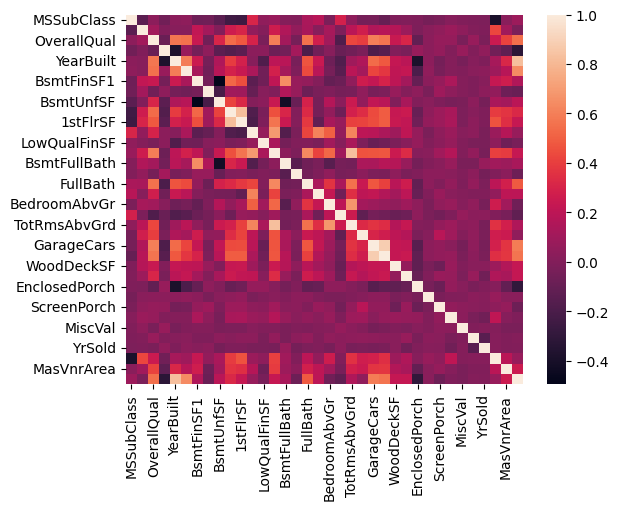

In [205]:
sns.heatmap(df_numeric.corr())

In [207]:
df_train['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [208]:
def search_large_corr_feat(df, dependent_var, numeric_cols, threshold_1):

    feats = {}
    for col in numeric_cols:
        value = df[[col, dependent_var]].corr()[col][dependent_var]
        if value >= threshold_1:
            feats[col]=value
    
    return feats

In [209]:
large_corr_feats = search_large_corr_feat(df_train, dependent_var, numeric_cols, threshold_1)

In [212]:
def search_original_feats(df, large_corr_feats, threshold_2):

    df_large_numeric_corr = df[large_corr_feats.keys()].corr()

    original_feats = {}

    for col, corr_value in large_corr_feats.items():
        df_col = df_large_numeric_corr[col].apply(lambda x: abs(x))   
        _cond = (df_col >= threshold_2) & (df_col < 1)
        similar_cols = df_col[_cond].index
        if len(similar_cols)>=1:
            similar_cols_corr_max = np.max([large_corr_feats[key] for key in similar_cols])
            if corr_value > similar_cols_corr_max:
                original_feats[col]=corr_value
            else:
                pass
        else:
            original_feats[col]=corr_value
    
    return original_feats


In [213]:
search_original_feats(df_train, large_corr_feats, threshold_2)

{'OverallQual': 0.7909816005838053,
 'Fireplaces': 0.46692883675152763,
 'WoodDeckSF': 0.32441344456812926,
 'OpenPorchSF': 0.31585622711605504,
 'LotFrontage': 0.35179909657067737,
 'MasVnrArea': 0.47749304709571444}

In [231]:
def grid_search_for_filter_corr(df, dependent_var, numeric_cols, threshold_1_range, threshold_2_range):

    threshold_2_list=[]
    for threshold_1 in threshold_1_range:
        threshold_1_list=[f"threshold_1_{threshold_1}"]
        for threshold_2 in threshold_2_range:

            large_corr_feats = search_large_corr_feat(df, dependent_var, numeric_cols, threshold_1)
            original_feats = search_original_feats(df, large_corr_feats, threshold_2)

            threshold_1_list.append(len(original_feats))
        
        threshold_2_list.append(threshold_1_list)
    
    results = pd.DataFrame(threshold_2_list, columns=["threshold_1"]+[f"threshold_2_{threshold_2}" for threshold_2 in threshold_2_range])
    results = results.set_index("threshold_1")

    return results




In [234]:
threshold_1_range = [i/10 for i in range(0,10)]
threshold_2_range = [i/10 for i in range(0,10)]

In [236]:
df_threshold = grid_search_for_filter_corr(df_train, dependent_var, numeric_cols, threshold_1_range, threshold_2_range)

In [237]:
df_threshold

,threshold_2_0.0,threshold_2_0.1,threshold_2_0.2,threshold_2_0.3,threshold_2_0.4,threshold_2_0.5,threshold_2_0.6,threshold_2_0.7,threshold_2_0.8,threshold_2_0.9
threshold_1,,,,,,,,,,
threshold_1_0.0,1,3,4,6,7,12,17,23,23,27
threshold_1_0.1,1,1,2,3,4,9,14,20,20,24
threshold_1_0.2,1,1,1,2,3,8,13,18,18,22
threshold_1_0.3,1,1,1,2,3,6,11,14,14,18
threshold_1_0.4,1,1,1,1,1,3,7,9,9,13
threshold_1_0.5,1,1,1,1,1,1,5,7,7,10
threshold_1_0.6,1,1,1,1,1,1,3,4,4,6
threshold_1_0.7,1,1,1,1,1,1,2,2,2,2
threshold_1_0.8,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: ylabel='threshold_1'>

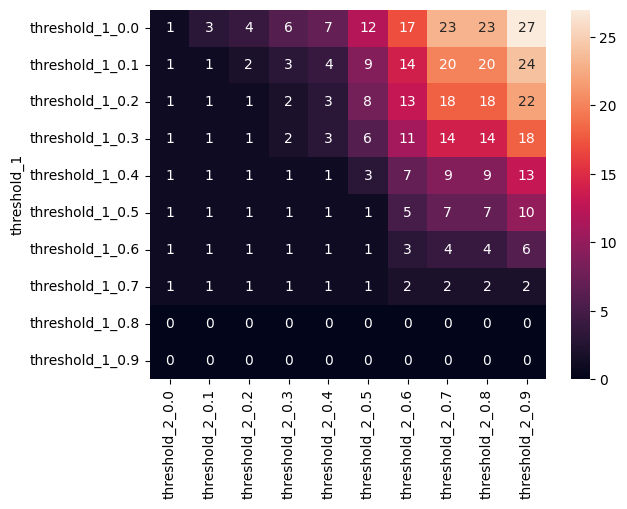

In [238]:
sns.heatmap(df_threshold, annot=True)